# **<center> MAESTRÍA EN INGENIERÍA - ANALÍTICA**

**Estudiante:** Luis Felipe Ortiz

**Director** Sergio Armando Gutierrez Betancur. **Codirector** John Willian Branch Bedoya

**Proyecto:** Método para predicción de la intención de compra de usuarios en línea, utilizando técnicas de aprendizaje de máquina.


**Aálisis de técnicas para la fundamentación del método predictivo**

Se seleccionando específicamente las técnicas de Bosques Aleatorios y XGBoost por su rendimiento similar en la métrica AUC, con valores de 0.93 y 0.92, respectivamente. Este enfoque busca aprovechar las fortalezas de ambas técnicas para mejorar la precisión en la predicción de comportamientos de compra en el entorno digital.

XGBoost se distingue por su mayor precisión, demostrada en su capacidad para identificar de forma acertada las instancias positivas y negativas, un aspecto crucial para la predicción fiable de la intención de compra en línea, como señala el estudio de Yang et al. (2022). A pesar de que el AUC de los Bosques Aleatorios es ligeramente menor, esta técnica sobresale en escenarios con una gran cantidad de variables de entrada, típicos del comercio electrónico.

La habilidad de los Bosques Aleatorios para realizar la selección de características de manera eficiente, incluso frente a un volumen elevado de variables, contribuye significativamente a la mejora de la precisión y el desempeño en la clasificación, según lo reportado por Lilhore et al. (2021).





In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Técnica de Bosques Aleatorios**

<ipython-input-6-b5b37dbc5e94>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_imp.head(10), palette=colors)


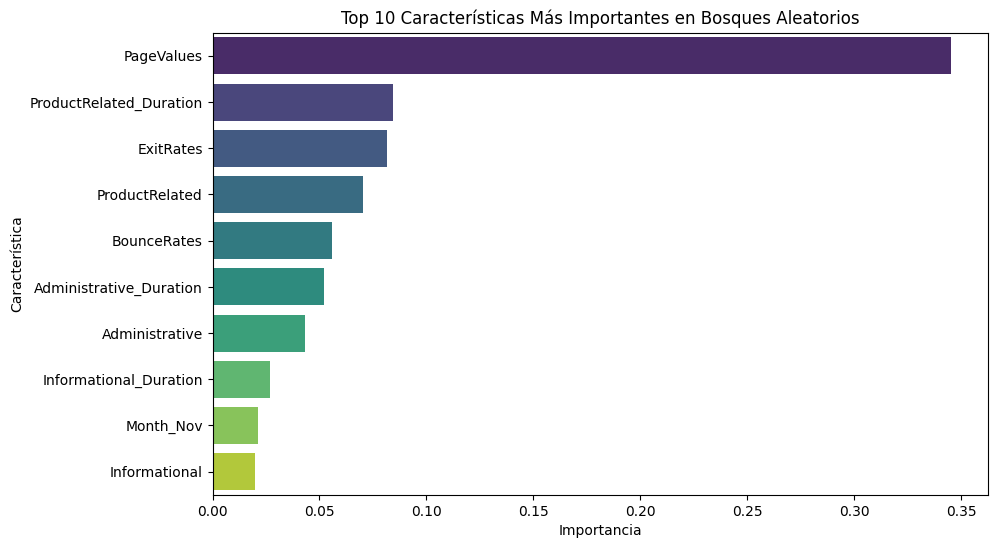

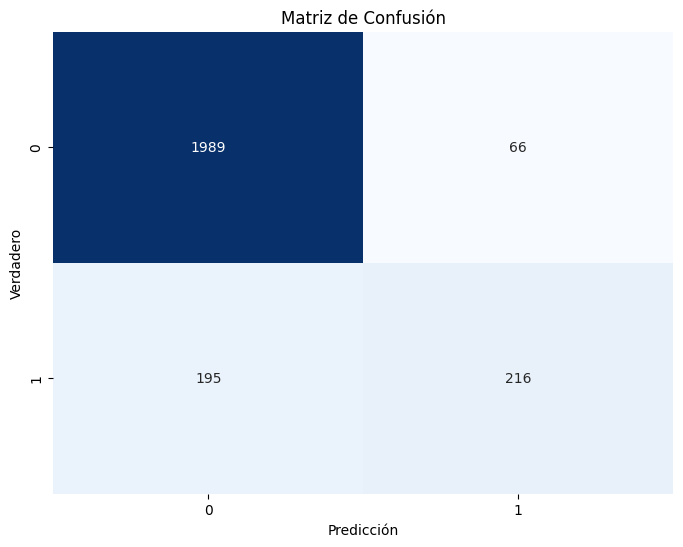

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

# Preprocesamiento
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Dividir en entrenamiento y prueba
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y ajustar el modelo
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1,
                               min_samples_split=2, n_estimators=50, random_state=42)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
model_pipeline.fit(X_train, y_train)

# Predicciones
y_pred = model_pipeline.predict(X_test)

# Importancia de las características
feature_importances = model.feature_importances_
onehot_columns = list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features))
feature_names = numeric_features + onehot_columns
feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Gráfico de Importancia de las Características
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", n_colors=feature_imp.head(10).shape[0])
sns.barplot(x="Importance", y="Feature", data=feature_imp.head(10), palette=colors)
plt.title("Top 10 Características Más Importantes en Bosques Aleatorios")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


Se han identificado diez características clave, siendo los valores de página (PageValues) la más sobresaliente, seguida por la duración de la interacción del usuario con productos relacionados (ProductRelated_Duration) y las tasas de salida (ExitRates). Este hallazgo subraya la importancia de las páginas visitadas, el tiempo invertido en productos relevantes y las tasas de salida para determinar la probabilidad de que un usuario efectúe una compra. La significancia de estas características resalta cómo la interacción del usuario con el sitio web y la calidad de su experiencia son factores determinantes para predecir la intención de compra.

La matriz de confusión presentada en la figura anterior ilustra la capacidad de la técnica para clasificar correctamente las instancias de prueba en dos categorías: usuarios que realizaron una compra (1) y usuarios que no la realizaron (0). Los valores en la diagonal principal (verdaderos positivos y verdaderos negativos) indican el número de predicciones correctas para cada clase, mientras que los valores fuera de esta diagonal representan los errores (falsos positivos y falsos negativos).

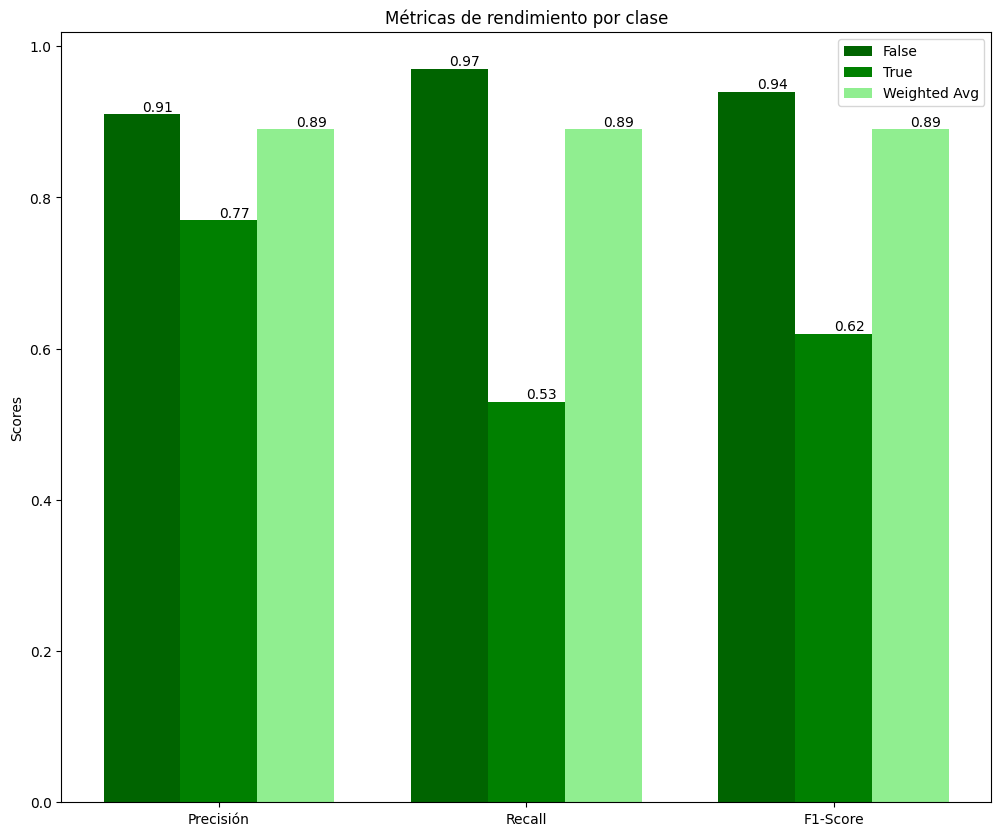

In [ ]:
#Rendimiento

# métricas para cada clase
precision_false = 0.91
precision_true = 0.77
recall_false = 0.97
recall_true = 0.53
f1_score_false = 0.94
f1_score_true = 0.62
weighted_avg_precision = 0.89
weighted_avg_recall = 0.89
weighted_avg_f1 = 0.89

# Datos para las barras
labels = ['Precisión', 'Recall', 'F1-Score']
false_scores = [precision_false, recall_false, f1_score_false]
true_scores = [precision_true, recall_true, f1_score_true]
weighted_avg_scores = [weighted_avg_precision, weighted_avg_recall, weighted_avg_f1]

x = np.arange(len(labels))
bar_width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 10))

# Generar las barras
bars1 = ax.bar(x - bar_width, false_scores, bar_width, label='False', color='darkgreen')
bars2 = ax.bar(x, true_scores, bar_width, label='True', color='green')
bars3 = ax.bar(x + bar_width, weighted_avg_scores, bar_width, label='Weighted Avg', color='lightgreen')

# Etiquetas de los ejes y título
ax.set_ylabel('Scores')
ax.set_title('Métricas de rendimiento por clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Etiquetas de datos
for bar in bars1 + bars2 + bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom')  # va: vertical alignment

# Mostrar el gráfico
plt.show()


En la Figura 5-4 se compara la precisión, el recall y el F1-score de dos clases, "False" y "True". La clase "False" muestra una alta efectividad con una precisión del 91% y un recall del 97%, reflejado en un F1-score del 94%. Por otro lado, la clase "True" presenta una precisión del 77% y un recall más bajo del 53%, con un F1-score del 62%, indicando que el modelo es menos eficaz para detectar esta clase. El promedio ponderado de las métricas supera el 89%, lo que sugiere un rendimiento general bueno del modelo. La técnica alcanzó una precisión global de 89.42%.

# **Técnica de XGBoost**


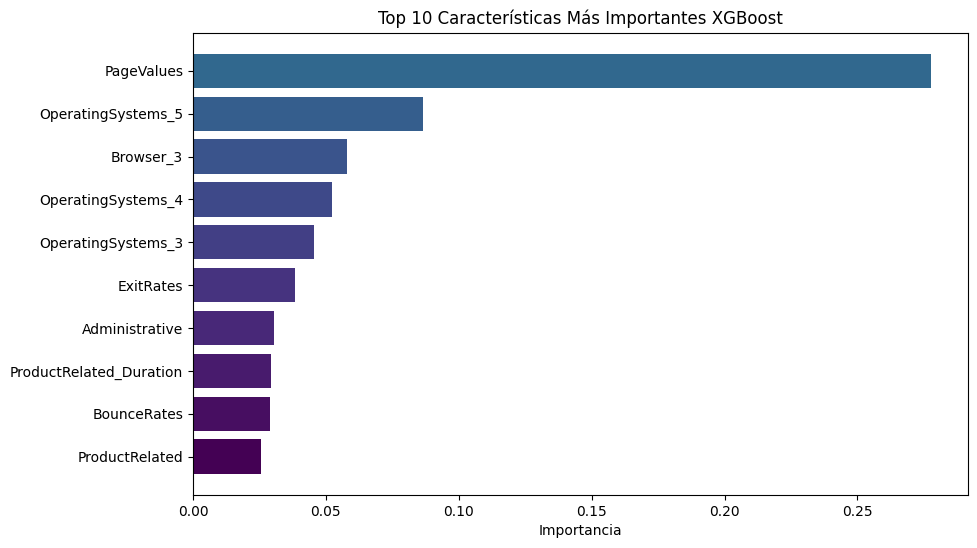

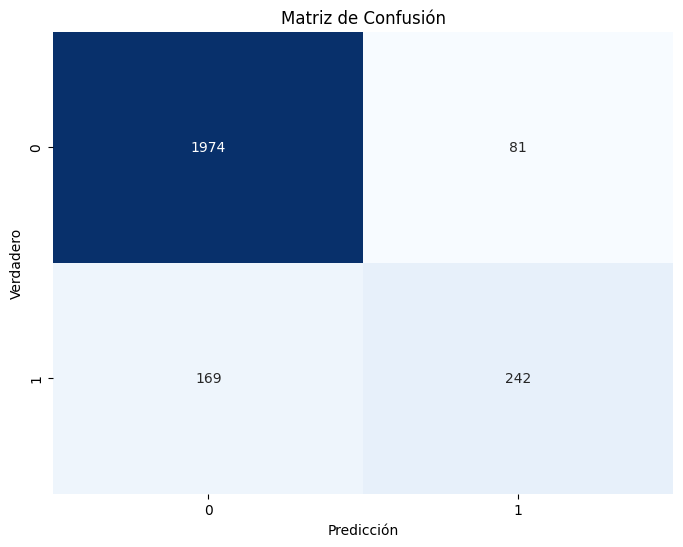

In [ ]:

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

# Preparar columnas categóricas y numéricas para el preprocesamiento
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns.drop('Revenue')

# Crear el preprocesador con OneHotEncoder y StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Aplicar preprocesamiento y dividir los datos
X = preprocessor.fit_transform(data.drop('Revenue', axis=1))
y = data['Revenue'].astype(int)  # Asegúrate de que el target es numérico
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo XGBoost
model = xgb.XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.9,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# Calcular la importancia de las características
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Gráfico de importancia de las características
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))
plt.barh(np.arange(len(sorted_idx[-10:])), feature_importances[sorted_idx][-10:], color=colors)
plt.yticks(np.arange(len(sorted_idx[-10:])), [feature_names[i] for i in sorted_idx][-10:])
plt.xlabel('Importancia')
plt.title('Top 10 Características Más Importantes XGBoost')
plt.show()

# Matriz de Confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()




Se identifican diez variables principales. La variable más destacada es los valores de página (PageValues), seguida por la variable mes (Month) y el visitante que regresa (Returning Visitor). Este resultado confirma la importancia de las páginas visualizadas y el tiempo dedicado a productos relacionados.

La matriz de confusión ilustra la capacidad de la técnica para clasificar correctamente las instancias de prueba en dos categorías: usuarios que realizaron una compra (1) y usuarios que no la realizaron (0).


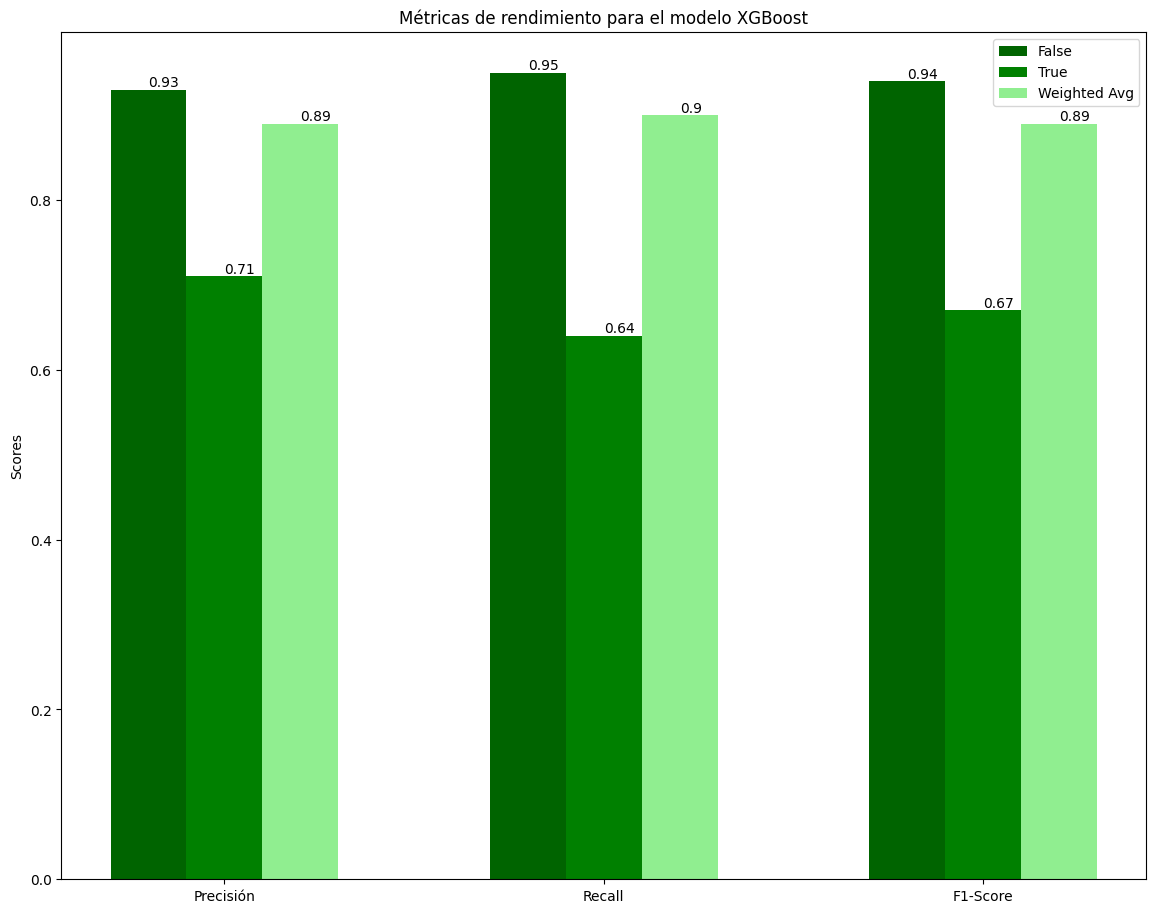

In [ ]:
# Definir las métricas para cada clase y el promedio ponderado según la descripción proporcionada
precision_false_xgb = 0.93
precision_true_xgb = 0.71
recall_false_xgb = 0.95
recall_true_xgb = 0.64
f1_score_false_xgb = 0.94
f1_score_true_xgb = 0.67
weighted_avg_precision_xgb = 0.89
weighted_avg_recall_xgb = 0.90
weighted_avg_f1_xgb = 0.89

# Datos para las barras
labels_xgb = ['Precisión', 'Recall', 'F1-Score']
false_scores_xgb = [precision_false_xgb, recall_false_xgb, f1_score_false_xgb]
true_scores_xgb = [precision_true_xgb, recall_true_xgb, f1_score_true_xgb]
weighted_avg_scores_xgb = [weighted_avg_precision_xgb, weighted_avg_recall_xgb, weighted_avg_f1_xgb]

x_xgb = np.arange(len(labels_xgb))  # Posición de las etiquetas
bar_width_xgb = 0.20  # Ancho de las barras

fig_xgb, ax_xgb = plt.subplots(figsize=(14, 11))

# Generar las barras
bars1_xgb = ax_xgb.bar(x_xgb - bar_width_xgb, false_scores_xgb, bar_width_xgb, label='False', color='darkgreen')
bars2_xgb = ax_xgb.bar(x_xgb, true_scores_xgb, bar_width_xgb, label='True', color='green')
bars3_xgb = ax_xgb.bar(x_xgb + bar_width_xgb, weighted_avg_scores_xgb, bar_width_xgb, label='Weighted Avg', color='lightgreen')

# Añadir las etiquetas de los ejes y título
ax_xgb.set_ylabel('Scores')
ax_xgb.set_title('Métricas de rendimiento para el modelo XGBoost')
ax_xgb.set_xticks(x_xgb)
ax_xgb.set_xticklabels(labels_xgb)
ax_xgb.legend()

# Mostrar las etiquetas de datos en cada barra
for bar in bars1_xgb + bars2_xgb + bars3_xgb:
    yval_xgb = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval_xgb, round(yval_xgb,2), va='bottom')  # va: vertical alignment

# Mostrar el gráfico
plt.show()




La Figura 5-7 se compara la precisión, recall y F1-score de dos clases "False" y "True". Se observa que la clase "False" exhibe un rendimiento sobresaliente con una precisión del 93% y un recall del 95%, lo que se traduce en un F1-score del 94%. Esto demuestra la alta eficiencia del modelo en la identificación correcta de instancias negativas. En contraste, la clase "True" registra una precisión del 71% y un recall del 64%, con un F1-score del 67%, indicando una eficacia menor en la detección de instancias positivas. La precisión, recall y F1-score son del 89%, 90% y 89%, respectivamente, lo que evidencia un desempeño general favorable del modelo. De este modo, la técnica logra una precisión global del 89.57%.